# Wrangle Armenian Online Job Posting Data
References:
- [Kaggle: Armenian Online Job Posting](https://www.kaggle.com/udacity/armenian-online-job-postings)
- [ZipFile Docs](https://docs.python.org/3/library/zipfile.html)
- [Tidy Data in Python](http://www.jeannicholashould.com/tidy-data-in-python.html) + [Non-tidy data](https://simplystatistics.org/2016/02/17/non-tidy-data/)
- [Data Wrangling Versus ETL: What’s the Difference?](https://tdwi.org/articles/2017/02/10/data-wrangling-and-etl-differences.aspx)

## Gather

In [ ]:
# Import dependencies
import os
import zipfile
import pandas as pd

In [3]:
# Set the enviroment variables
os.environ['KAGGLE_USERNAME'] = "lubomrstraka"
os.environ['KAGGLE_KEY'] = "c7347462ef834e6645ce238c2f2fa561"

# Download datasets
# os.system("kaggle datasets download -d udacity/armenian-online-job-postings --force")
! kaggle datasets download -d udacity/armenian-online-job-postings --force

0

In [6]:
# Extract ZIP file
with zipfile.ZipFile('armenian-online-job-postings.zip', 'r') as myzip:
  myzip.extractall()

In [7]:
os.listdir()

['.config',
 'armenian-online-job-postings.zip',
 'features.txt',
 'example-job-posting.jpg',
 'online-job-postings.csv',
 'sample_data']

In [8]:
# Read CSV file into DataFrame
df = pd.read_csv('online-job-postings.csv')

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,Location,JobDescription,JobRequirment,RequiredQual,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\r\nJOB TI...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,"Yerevan, Armenia",AMERIA Investment Consulting Company is seekin...,- Supervises financial management and administ...,"To perform this job successfully, an\r\nindivi...",NaN,"To apply for this position, please submit a\r\...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,"IREX Armenia Main Office; Yerevan, Armenia \r\...",NaN,NaN,- Bachelor's Degree; Master's is preferred;\r\...,NaN,Please submit a cover letter and resume to:\r\...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\r\nJ...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\r\nPOSITION,"Yerevan, Armenia",Public outreach and strengthening of a growing...,- Working with the Country Director to provide...,"- Degree in environmentally related field, or ...",NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\r\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\r\...,NaN,2004,1,False
3,Manoff Group\r\nJOB TITLE: BCC Specialist\r\n...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,"Manila, Philippines",The LEAD (Local Enhancement and Development fo...,- Identify gaps in knowledge and overseeing in...,"- Advanced degree in public health, social sci...",NaN,Please send cover letter and resume to Amy\r\n...,NaN,23 January 2004\r\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\r\nJOB TITLE: Software...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,"Yerevan, Armenia",NaN,- Rendering technical assistance to Database M...,- University degree; economical background is ...,NaN,Successful candidates should submit\r\n- CV; \...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True


## Assess
### Data Quality
*Low quality data* is commonly referred to as **dirty data**. Dirty data has issues with its *content*.
- Missing data
- Invalid data
- Inaccurate data
- Inconsistent data
- Multiple terms that mean the same thing

### Tidiness
*Untidy* data is commonly referred to as **"messy" data**. Messy data has issues with its *structure*. In tidy data:
- Each variable forms a column.
- Each observation forms a row.
- Each type of observational unit forms a table.


In [9]:
df

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,Location,JobDescription,JobRequirment,RequiredQual,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\r\nJOB TI...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,"Yerevan, Armenia",AMERIA Investment Consulting Company is seekin...,- Supervises financial management and administ...,"To perform this job successfully, an\r\nindivi...",NaN,"To apply for this position, please submit a\r\...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,"IREX Armenia Main Office; Yerevan, Armenia \r\...",NaN,NaN,- Bachelor's Degree; Master's is preferred;\r\...,NaN,Please submit a cover letter and resume to:\r\...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\r\nJ...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\r\nPOSITION,"Yerevan, Armenia",Public outreach and strengthening of a growing...,- Working with the Country Director to provide...,"- Degree in environmentally related field, or ...",NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\r\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\r\...,NaN,2004,1,False
3,Manoff Group\r\nJOB TITLE: BCC Specialist\r\n...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,"Manila, Philippines",The LEAD (Local Enhancement and Development fo...,- Identify gaps in knowledge and overseeing in...,"- Advanced degree in public health, social sci...",NaN,Please send cover letter and resume to Amy\r\n...,NaN,23 January 2004\r\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\r\nJOB TITLE: Software...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,"Yerevan, Armenia",NaN,- Rendering technical assistance to Database M...,- University degree; economical background is ...,NaN,Successful candidates should submit\r\n- CV; \...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18996,Technolinguistics NGO\r\n\r\n\r\nTITLE: Senio...,"Dec 28, 2015",Senior Creative UX/ UI Designer,Technolinguistics NGO,NaN,Full-time,NaN,NaN,NaN,Long-term,"Yerevan, Armenia",A tech startup of Technolinguistics based in N...,- Work closely with product and business teams...,- At least 5 years of experience in Interface/...,Competitive,"To apply for this position, please send your\r...",29 December 2015,28 January 2016,NaN,As a company Technolinguistics has a mandate t...,NaN,2015,12,False
18997,"""Coca-Cola Hellenic Bottling Company Armenia"" ...","Dec 30, 2015",Category Development Manager,"""Coca-Cola Hellenic Bottling Company Armenia"" ...",NaN,Full-time,All interested professionals.,NaN,ASAP,Long-term with a probation period of 3 months.,"Yerevan, Armenia",NaN,- Establish and manage Category Management dev...,"- University degree, ideally business related;...",NaN,All interested candidates are kindly requested...,30 December 2015,20 January 2016,NaN,NaN,NaN,2015,12,False
18998,"""Coca-Cola Hellenic Bottling Company Armenia"" ...","Dec 30, 2015",Operational Marketing Manager,"""Coca-Cola Hellenic Bottling Company Armenia"" ...",NaN,Full-time,All interested professionals.,NaN,ASAP,Long-term with a probation period of 3 months.,"Yerevan, Armenia",NaN,"- Develop, establish and maintain marketing st...","- Degree in Business, Marketing or a related f...",NaN,All interested candidates are kindly requested...,30 December 2015,20 January 2016,NaN,NaN,NaN,2015,12,False
18999,San La

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   jobpost           19001 non-null  object
 1   date              19001 non-null  object
 2   Title             18973 non-null  object
 3   Company           18994 non-null  object
 4   AnnouncementCode  1208 non-null   object
 5   Term              7676 non-null   object
 6   Eligibility       4930 non-null   object
 7   Audience          640 non-null    object
 8   StartDate         9675 non-null   object
 9   Duration          10798 non-null  object
 10  Location          18969 non-null  object
 11  JobDescription    15109 non-null  object
 12  JobRequirment     16479 non-null  object
 13  RequiredQual      18517 non-null  object
 14  Salary            9622 non-null   object
 15  ApplicationP      18941 non-null  object
 16  OpeningDate       18295 non-null  object
 17  Deadline    

In [16]:
df.Year.value_counts()

2012    2149
2015    2009
2013    2009
2014    1983
2008    1785
2011    1697
2007    1538
2010    1511
2009    1191
2005    1138
2006    1116
2004     875
Name: Year, dtype: int64

Quality Issues
- Missing values (NaN)
- StartDate inconsistencies (ASAP, Immediate(ly), 'as soon as possible')
- Nondescriptive columns headers (ApplicationP, AboutC, RequiredQual ... and also JobRequirment)

Tidiness Issues
- Duplicate reprezentation of year and month data.
- Two types of observational units in this dataset (normalization issue) - jobposting data and company data (`AboutC`, i.e. `About Company`) are both related to `Company`.


## Clean

In [17]:
df_clean = df.copy()

### Missing values
We can't really do anything with the NaNs, because the job posting didn't have this stuff. Just make a mental note and be aware of these missing values when  coding because they can cause unintuitive results.

### `StartDate` Inconsistencies
#### Define
Select all records in the `StartDate` column that have "as soon as possible", "immidiately", etc. and replace the text in those cells with "ASAP".

#### Code

In [22]:
asap_list = ['Immediately', 'As soon as possible', 'Upon hiring',
             'Immediate', 'Immediate employment', 'As soon as possible.', 'Immediate job opportunity',
             '"Immediate employment, after passing the interview."',
             'ASAP preferred', 'Employment contract signature date',
             'Immediate employment opportunity', 'Immidiately', 'ASA',
             'Asap', '"The position is open immediately but has a flexible start date depending on the candidates earliest availability."',
             'Immediately upon agreement', '20 November 2014 or ASAP',
             'immediately', 'Immediatelly',
             '"Immediately upon selection or no later than November 15, 2009."',
             'Immediate job opening', 'Immediate hiring', 'Upon selection',
             'As soon as practical', 'Immadiate', 'As soon as posible',
             'Immediately with 2 months probation period',
             '12 November 2012 or ASAP', 'Immediate employment after passing the interview',
             'Immediately/ upon agreement', '01 September 2014 or ASAP',
             'Immediately or as per agreement', 'as soon as possible',
             'As soon as Possible', 'in the nearest future', 'immediate',
             '01 April 2014 or ASAP', 'Immidiatly', 'Urgent',
             'Immediate or earliest possible', 'Immediate hire',
             'Earliest  possible', 'ASAP with 3 months probation period.',
             'Immediate employment opportunity.', 'Immediate employment.',
             'Immidietly', 'Imminent', 'September 2014 or ASAP', 'Imediately']

In [23]:
for phrase in asap_list:
  df_clean.replace(to_replace=phrase, value='ASAP', inplace=True)

#### Test

In [24]:
df_clean.StartDate.value_counts()

ASAP                   6856
01 September 2012        31
March 2006               27
November 2006            22
January 2010             19
                       ... 
08 May 2006, 09:15.       1
February                  1
08 September 2011         1
12 December 2004          1
September 6               1
Name: StartDate, Length: 1140, dtype: int64

In [25]:
for phrase in asap_list:
  assert phrase not in df_clean.StartDate.values

### Non-descriptive Column Headers
#### Define
Select all nondescriptive and misspeled column headers (ApplicationP, AboutC, RequiredQual, JobRequirment) and replace them with full words (ApplicationProcedure, AboutCompany, RequiredQualifications, JobRequirement).

#### Code

In [20]:
df_clean.rename(columns={'ApplicationP': 'ApplicationProcedure', 
                         'AboutC': 'AboutCompany', 
                         'RequiredQual': 'RequiredQualifications', 
                         'JobRequirment': 'JobRequirements'}, inplace=True)

#### Test

In [21]:
df_clean.columns

Index(['jobpost', 'date', 'Title', 'Company', 'AnnouncementCode', 'Term',
       'Eligibility', 'Audience', 'StartDate', 'Duration', 'Location',
       'JobDescription', 'JobRequirement', 'RequiredQualifications', 'Salary',
       'ApplicationProcedure', 'OpeningDate', 'Deadline', 'Notes',
       'AboutCompany', 'Attach', 'Year', 'Month', 'IT'],
      dtype='object')

## Analysis & Visualization

In [26]:
# Number of 'ASAP' start dates (numerator)
asap_counts = df_clean.StartDate.value_counts()['ASAP']
asap_counts

6856

In [27]:
# Number of non-empty start dates (denominator)
non_empty_counts = df_clean.StartDate.count()
non_empty_counts

9675

In [28]:
# Percentage of positions with an urgent start date i.e. 'ASAP'
asap_counts / non_empty_counts

0.7086304909560723

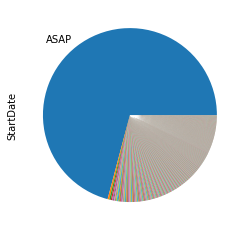

In [31]:
%matplotlib inline
import numpy as np
labels = np.full(len(df_clean.StartDate.value_counts()), "", dtype=object)
labels[0] = 'ASAP'
df_clean.StartDate.value_counts().plot(kind="pie", labels=labels);

In [32]:
# Number of 'ASAP' start dates in original dataset (numerator)
asap_counts = df.StartDate.value_counts()['ASAP']
# Percentage of positions with an urgent start date i.e. 'ASAP' in original dataset
asap_counts / non_empty_counts

0.4913695090439276

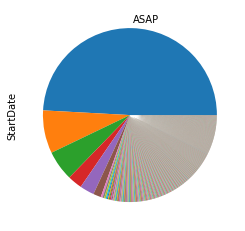

In [30]:
%matplotlib inline
import numpy as np
labels = np.full(len(df.StartDate.value_counts()), "", dtype=object)
labels[0] = 'ASAP'
df.StartDate.value_counts().plot(kind="pie", labels=labels);